## Fordgobike tripdata (02/2019) Analysis

### Investigation Overview
In this investigation I wanted to explore main features of fordgobike tripdata fro the month of February covering the greater San Francisco Bay area. The objective of this investigation is to look into the relationship between trip duration with other categorical variables in the datset and answer the questions like:
- how does the trip duration look like?
- how does the trip duration differ by member_age, member_gender, user_type and start_hour?
- what days and which hours have highest demand for trips?
- how long are the rides taken by the user_type?
- what is the percentage of member_gender taking the rides?

### Dataset Overview
The dataset contains 174952 rows and 17 columns for Ford GoBike System, which covers the greater San Francisco Bay area. The dataset contains:
- trip duration
- start/end time for bike rides
- start date for bike rides
- start/end station names
- customer data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int64  
 14  memb

In [4]:
# clean the field dtypes
# convert start_time and end_time into datetime 

df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [5]:
# convert start_station_id, end_station_id, and bike_id into strings

df['start_station_id'] = df.start_station_id.astype('str')
df['end_station_id'] = df.end_station_id.astype('str')
df['bike_id'] = df.bike_id.astype('str')

In [6]:
# convert user_type and member_gender into categories

df['user_type'] = df.user_type.astype('category')
df['member_gender'] = df.member_gender.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### Trip Duration

In this investigation I've observed that 96% of trips were less than 30 minutes and 0.79% of trips were more than an hour, which can be considered as outliers. Even when we look into duration_sec column most of the values fall below 2000 seconds with the peak between 500-600 seconds.

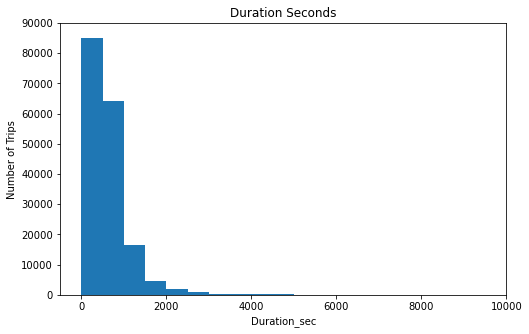

In [8]:
# distribution by duration_sec

bins = np.arange(0, df['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Duration Seconds')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

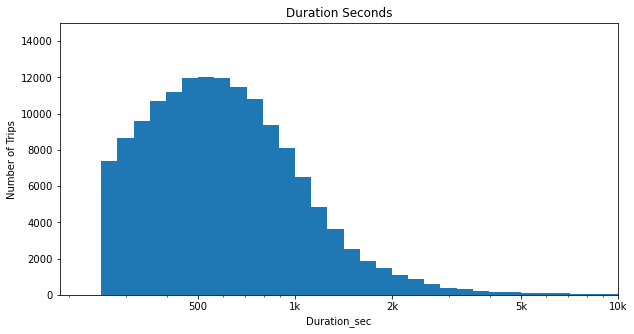

In [9]:
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+0.05, 0.05)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Duration Seconds')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()



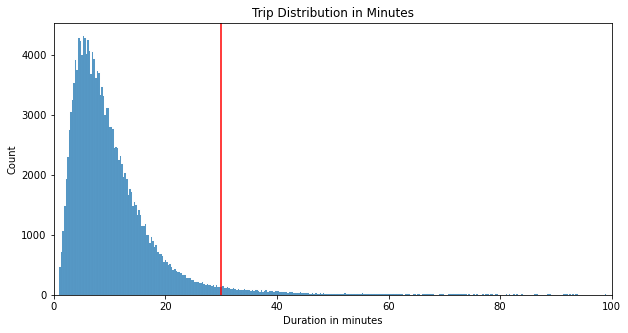

In [10]:
# distribution by trip_duration_min

plt.figure(figsize = (10, 5))

sns.histplot(data = df, x = "trip_duration_min")
plt.xlim(0, 100)
plt.title("Trip Distribution in Minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.axvline(x=30, color = "red")

plt.show()

### User Type
Most of the riders are the subscribers riding to and fro from work and school. From the plot it can be said that, subscribers represent 90% and are the majority bike riders compared to customers who represent only 9%.

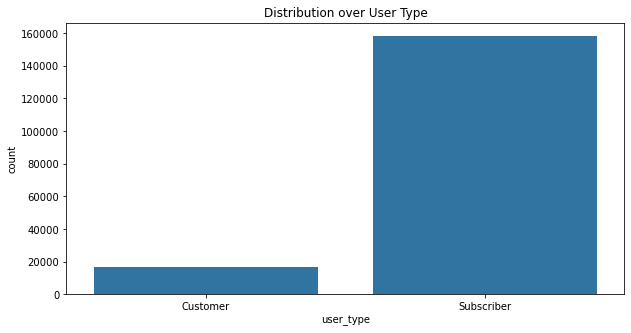

In [22]:
# distribution over user_type

base_color = sns.color_palette()[0]
plt.figure(figsize = (10,5))

counts = df['user_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plot = sns.countplot(data=df, x='user_type', color=base_color)

plt.title("Distribution over User Type");

plt.show()

### Time Vs Demand for bikes

Peak hours are those from 7am - 9am and 4pm - 6pm. This might be related to the time when employees and students go to and leave work and school. From the plot we can say that the demand for bikes are high during these peak hours. 

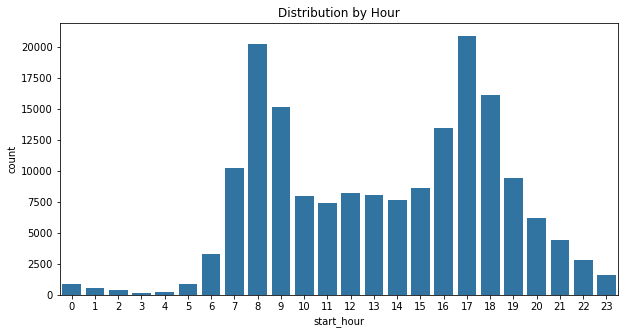

In [12]:
plt.figure(figsize = (10,5))

base_color = sns.color_palette()[0]

sns.countplot(data = df, x = 'start_hour', color = base_color)
plt.title("Distribution by Hour")

plt.show()

### Trip distribution over day of the week
The trips gradually increse from Monday and reaches the highest peak on Thursday and then, it declines reaching its lowest on saturday and Sunday being the holidays, we can undersatnd its decline. This further confirms the subscribers riding to and fro from work and school from Monday to Friday.

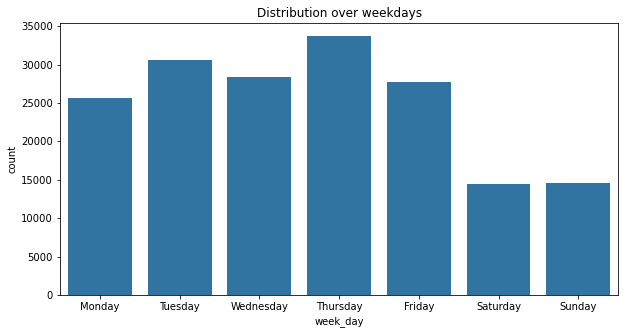

In [13]:
# distribution over week_day

plt.figure(figsize = (10,5))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_day_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

df['week_day'] = df['week_day'].astype(week_day_categ)

sns.countplot(data=df, x='week_day', color=base_color)

plt.title('Distribution over weekdays')

plt.show()

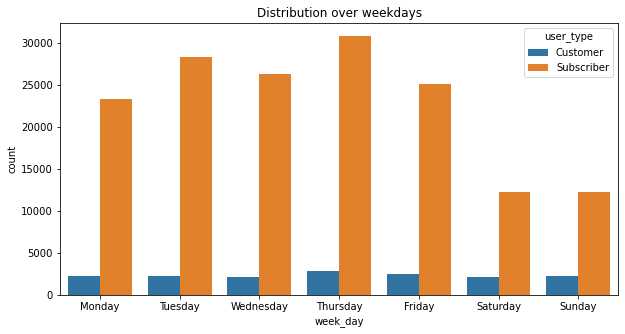

In [24]:
# Relationship between user_type and week_day

plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'week_day', hue = 'user_type');
plt.title('Distribution over weekdays');

### Member gender Vs User type

It observed from the plot  that the percentage of subscribers are higher regardless of the gender type.

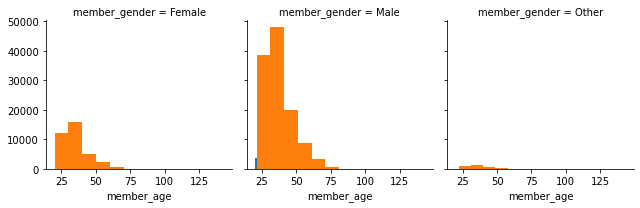

In [15]:
g = sns.FacetGrid(data = df, col = 'member_gender', hue = 'user_type')
g.map(plt.hist, 'member_age');

### Duration of rides between user types
From the plot it observed that subscribers ride shorter rides compared to customers. In other way, we can also say that customers have longer trips on each day of the week compared to subscribers. It can be further considered that subscribers are mostly the employees and students who take the ride to work and school and vice-versa. 

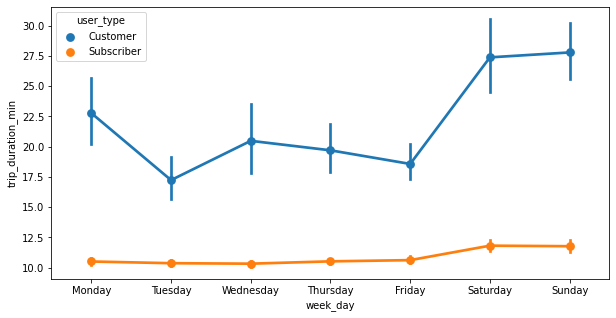

In [16]:
plt.figure(figsize = (10,5))
sns.pointplot(data = df, x = 'week_day', y = 'trip_duration_min', hue = 'user_type');

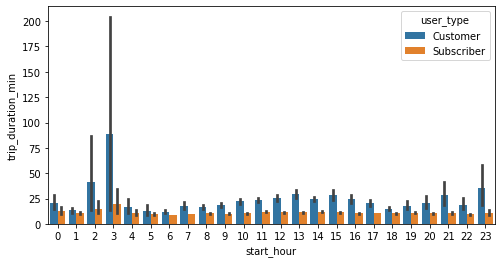

In [20]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = 'start_hour', y = 'trip_duration_min', hue = 'user_type');

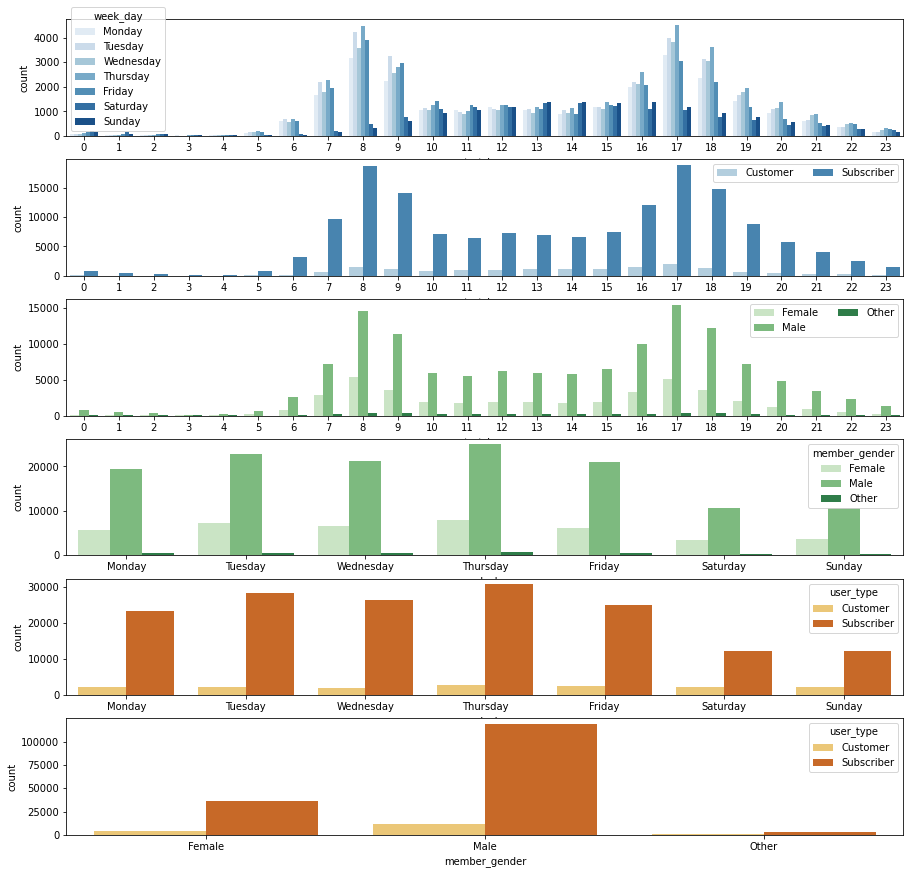

In [18]:
plt.figure(figsize = [15, 15])

# subplot 1: start_hour Vs Week_day
plt.subplot(6, 1, 1)
sns.countplot(data = df, x = 'start_hour', hue = 'week_day', palette = 'Blues')

# subplot 2: start_hour Vs user_type
ax = plt.subplot(6, 1, 2)
sns.countplot(data = df, x = 'start_hour', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: start_hour Vs member_gender
ax = plt.subplot(6, 1, 3)
sns.countplot(data = df, x = 'start_hour', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: Week_day Vs member_gender
ax = plt.subplot(6, 1, 4)
sns.countplot(data = df, x = 'week_day', hue = 'member_gender', palette = 'Greens')

# subplot 5: Week_day Vs user_type
ax = plt.subplot(6, 1, 5)
sns.countplot(data = df, x = 'week_day', hue = 'user_type', palette = 'YlOrBr')

# subplot 6: member_gender Vs user_type
ax = plt.subplot(6, 1, 6)
sns.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'YlOrBr')

plt.show()